
# Predicting Customer Satisfaction on Rent the Runway

##  III. EDA
### Katrin Ayrapetov


<font style="font-size: 2rem; color: blue">


 
</font>

### Overview of the Notebook: 

In this notebook statistical summaries are calculated for the features. Also, the interaction between the features are examined. 
<br> **Highlites**
<br> The Typical Customer is: 
<br>&emsp;&emsp;- 36 years old 
<br>&emsp;&emsp; - 5’4’’ and 140 pounds 
<br>&emsp;&emsp; - Renting mostly for work and for everyday wear

The Typical Dress is: 
<br> &emsp;&emsp;- $60.00 to rent 
<br> &emsp;&emsp; - Sleeveless
<br> &emsp;&emsp; - Has a v_neckline 
<br> &emsp;&emsp; - Has an hourglass shape 

Ages and Heights are approximately bell shaped. Weight are skewed right. 


THe satisfaction rating breakdown is: 5 - 60% , 4 - 23%, 3 - 10%, 2 - 4% , 1 - 3%  

In [1]:
#Import the necessary libraries. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customers =  pd.read_csv('../Data/df_customer_data_cleaned.csv')
df_dresses =  pd.read_csv('../Data/df_clean_dresses.csv')

In [32]:
df_customers.shape

(151499, 19)

In [3]:
maternity_index = []
for i in range(df_customers.shape[0]):
    if "maternity" in df_customers['Dress_Description'][i]:
        maternity_index.append(i)
df_customers = df_customers.drop(labels=maternity_index, axis=0)
df_customers = df_customers.reset_index()
df_customers.drop(columns=["index"],inplace=True)

In [7]:
df_customers.drop(columns = ['Retail_price', 'Rent_price','Product_details', 'Number_of_reviews'], inplace = True)

In [8]:
df_customers.columns

Index(['Type_of_Customer', 'Size', 'Overall_fit', 'Rented_for',
       'Size_usually_worn', 'Height', 'Age', 'Bust_size', 'Body_type',
       'Weight', 'Rating', 'Date', 'Brand', 'Dress_Description', 'Band_Size',
       'Cup_Size', 'BMI'],
      dtype='object')

In [5]:
df_dresses.columns

Index(['Brand', 'Dress_Description', 'Retail_price', 'Rent_price',
       'Number_of_reviews', 'cotton', 'nylon', 'cellulose', 'silk', 'spandex',
       'tencel', 'rayon', 'linen', 'cashmere', 'wool', 'leather', 'polyester',
       'metallic_fibers', 'Length', 'Sleeves', 'Neckline'],
      dtype='object')

In [9]:
df_customers['Dress_Description'] = df_customers['Dress_Description'].str.lower()
df_customers['Brand'] = df_customers['Brand'].str.lower()

In [10]:
df = pd.merge(df_customers, df_dresses, on='Dress_Description')

In [17]:
df.drop(columns=["Bust_size","Brand_y","Dress_Description"],inplace=True)

In [18]:
df.head(5)

,Type_of_Customer,Size,Overall_fit,Rented_for,Size_usually_worn,Height,Age,Body_type,Weight,Rating,Date,Brand_x,Band_Size,Cup_Size,BMI,Retail_price,Rent_price,Number_of_reviews,cotton,nylon,cellulose,silk,spandex,tencel,rayon,linen,cashmere,wool,leather,polyester,metallic_fibers,Length,Sleeves,Neckline
0,TOP CONTRIBUTOR,Size worn: SR,Overall fit: True to Size,Vacation,8,66,31,athletic,142,5,spring,tory burch,34.0,C,22.916896,478,70,33,69,27,0,0,4,0,0,0,0,0,0,0,0,midi,sleeveless,square_neckline
1,TOP CONTRIBUTOR,Size worn: MR,Overall fit: Large,Wedding,6,67,33,hourglass,150,5,spring,tory burch,36.0,C,23.490755,478,70,33,69,27,0,0,4,0,0,0,0,0,0,0,0,midi,sleeveless,square_neckline
2,TOP CONTRIBUTOR,Size worn: SR,Overall fit: Large,Everyday,6,66,27,pear,140,5,spring,tory burch,34.0,B,22.594123,478,70,33,69,27,0,0,4,0,0,0,0,0,0,0,0,midi,sleeveless,square_neckline
3,TOP CONTRIBUTOR,Size worn: LR,Overall fit: True to Size,unknown,12,66,42,pear,181,5,spring,tory burch,36.0,B,29.210973,478,70,33,69,27,0,0,4,0,0,0,0,0,0,0,0,midi,sleeveless,square_neckline
4,TOP CONTRIBUTOR,Size worn: LR,Overall fit: True to Size,Everyday,12,70,48,pear,165,5,spring,tory burch,34.0,D,23.672449,478,70,33,69,27,0,0,4,0,0,0,0,0,0,0,0,midi,sleeveless,square_neckline


In [19]:
df.dtypes

Type_of_Customer      object
Size                  object
Overall_fit           object
Rented_for            object
Size_usually_worn     object
Height                 int64
Age                    int64
Body_type             object
Weight                 int64
Rating                 int64
Date                  object
Brand_x               object
Band_Size            float64
Cup_Size              object
BMI                  float64
Retail_price           int64
Rent_price             int64
Number_of_reviews      int64
cotton                 int64
nylon                  int64
cellulose              int64
silk                   int64
spandex                int64
tencel                 int64
rayon                  int64
linen                  int64
cashmere               int64
wool                   int64
leather                int64
polyester              int64
metallic_fibers        int64
Length                object
Sleeves               object
Neckline              object
dtype: object

In [20]:
df.to_csv('../Data/df_clean_final.csv', header=True, index=False)

In [ ]:
# It seems like a more joyous occasion such as a wedding  or a date results in more 
# higher ratings. While a less joyous occasion such as work or everyday yields lower ratings. 
pd.crosstab(index=df['Number_'], columns=df['Rating'],margins=True,normalize='index').round(4)*100

In [5]:
def create_percentile_table(column):
    data =  {'Percentile': ["min",'10th', '20th', '30th', '40th',"50th","60th","70th","80th","90th","max"], 
          column: [df[column].min(),df[column].quantile(0.1), df[column].quantile(0.2), df[column].quantile(0.3), df[column].quantile(0.4),df[column].quantile(0.5),df[column].quantile(0.6),df[column].quantile(0.7),df[column].quantile(0.8),df[column].quantile(0.9),df[column].max()]} 
    percentile_table = pd.DataFrame(data)
    percentile_table.set_index('Percentile')
    return percentile_table

In [6]:
# How many brands are there total on the website? There are 519 different Brands. 
len(list(df.Brand.unique()))


508

In [7]:
#What are the summary statistics for the numeric features. 
df.describe()

,Height,Age,Weight,Rating,Retail_price,Rent_price,Number_of_reviews,BMI
count,156433.000000,156433.000000,156433.000000,156433.000000,156433.000000,156433.000000,156433.000000,156433.000000
mean,65.279794,37.696976,143.354618,4.333370,422.481088,60.342671,86.838276,23.650411
std,2.680930,9.169267,25.158986,1.008437,274.172210,38.791480,123.796784,3.932000
min,53.000000,0.000000,80.000000,1.000000,43.000000,30.000000,0.000000,12.528403
25%,63.000000,31.000000,125.000000,4.000000,245.000000,30.000000,36.000000,20.980257
50%,65.000000,36.000000,140.000000,5.000000,375.000000,50.000000,57.000000,22.826904
75%,67.000000,43.000000,155.000000,5.000000,498.000000,73.000000,95.000000,25.526621
max,78.000000,80.000000,298.000000,5.000000,3595.000000,525.000000,3489.000000,58.421053


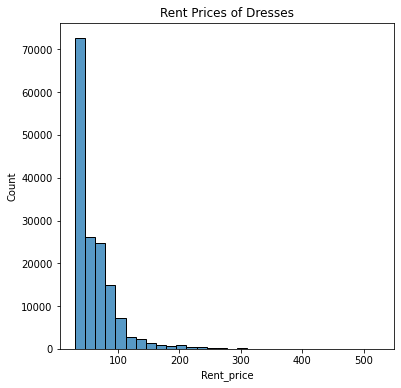

In [8]:
#what is the distribution of the rented price of the garments?
plt.figure(figsize=(6,6));
sns.histplot(data=df, x="Rent_price",bins=30).set(title='Rent Prices of Dresses');

In [9]:
#The average rent price of the garment is $60. 
df.Rent_price.mean()

60.34267066411819

In [10]:
#The median rent price of the garment is $50 and 90% of the garment costing $100.00 or less to rent. 
percentile_table_rent_prices = create_percentile_table('Rent_price')
percentile_table_rent_prices 

,Percentile,Rent_price
0,min,30.0
1,10th,30.0
2,20th,30.0
3,30th,35.0
4,40th,41.0
5,50th,50.0
6,60th,60.0
7,70th,69.0
8,80th,80.0
9,90th,100.0


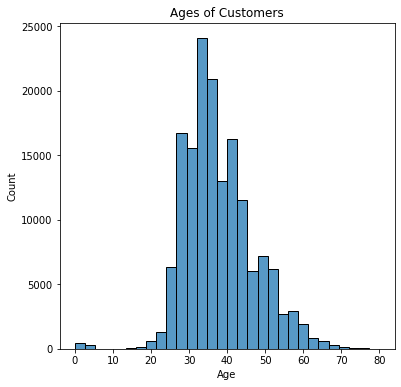

In [11]:
#What is Age distribution of the customers? 
plt.figure(figsize=(6,6));
sns.histplot(data=df, x="Age",bins=30).set(title='Ages of Customers');

In [12]:
#The average age of the customer is 37 years old. 
df.Age.mean() 

37.69697570205775

In [13]:
#The median age of the customer is 36 years old and 90% of the customers are 51 years old or younger. 
percentile_table_Age = create_percentile_table('Age')
percentile_table_Age

,Percentile,Age
0,min,0.0
1,10th,28.0
2,20th,30.0
3,30th,32.0
4,40th,34.0
5,50th,36.0
6,60th,39.0
7,70th,41.0
8,80th,45.0
9,90th,51.0


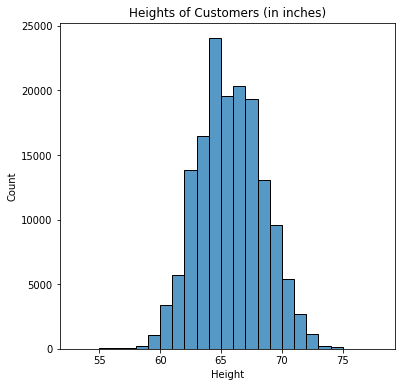

In [8]:
#What is Height distribution of the customers? 
plt.figure(figsize=(6,6));
sns.histplot(data=df, x="Height",bins=25).set(title='Heights of Customers (in inches)');

In [15]:
#The median height of the customer is 5 feet and 4 inches.  
percentile_table_Height = create_percentile_table('Height')
percentile_table_Height

,Percentile,Height
0,min,53.0
1,10th,62.0
2,20th,63.0
3,30th,64.0
4,40th,64.0
5,50th,65.0
6,60th,66.0
7,70th,67.0
8,80th,68.0
9,90th,69.0


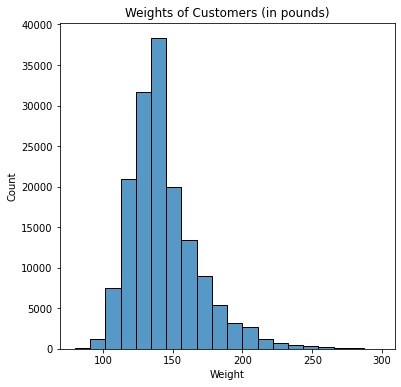

In [16]:
#What is Weight distribution of the customers? 

plt.figure(figsize=(6,6));
sns.histplot(data=df, x="Weight",bins=20).set(title='Weights of Customers (in pounds)');

In [17]:
#The average weight of the customer is 143 pounds. The median weight of the customer is 140.00 pounds. 
print(df.Weight.mean())
df.Weight.quantile(0.5)

143.3546182710809


140.0

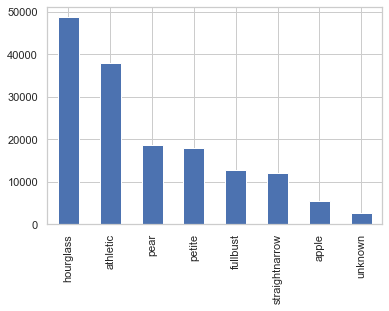

In [18]:
#What is the Body Type distribution of the customers? 
sns.set(style="whitegrid")
df.Body_type.value_counts().plot(kind="bar");

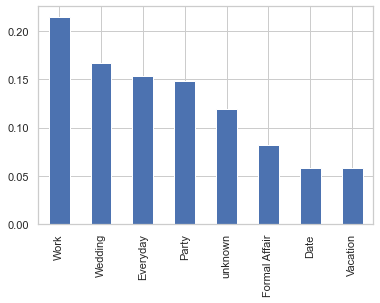

In [19]:
# What is the distribution of the events rented for ? 
#It looks like about 25% of the customers rent the clothes for work. 
df.Rented_for.value_counts(normalize=True).plot(kind="bar");

In [32]:
# It seems like a more joyous occasion such as a wedding  or a date results in more 
# higher ratings. While a less joyous occasion such as work or everyday yields lower ratings. 
pd.crosstab(index=df['Rented_for'], columns=df['Rating'],margins=True,normalize='index').round(4)*100

Rating,1,2,3,4,5
Rented_for,,,,,
Date,2.98,3.80,10.13,22.75,60.34
Everyday,4.38,6.06,13.84,25.08,50.65
Formal Affair,1.38,1.74,5.61,20.04,71.23
Party,2.59,3.51,8.34,21.95,63.62
Vacation,3.61,4.21,9.84,21.09,61.26
Wedding,1.08,1.71,4.90,21.39,70.92
Work,3.04,4.60,12.24,27.29,52.84
unknown,5.09,5.74,11.30,20.36,57.50
All,2.99,4.01,9.77,23.14,60.09


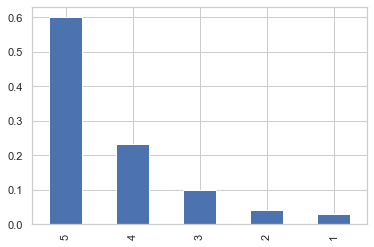

In [20]:
# What is the distribution for ratings for garments look like? 
#It looks like: 
# 5 - 60% , 4 - 23%, 3 - 10%, 2 - 4% , 1 - 3% 
df.Rating.value_counts(normalize=True).plot(kind="bar");

In [21]:
#Binarize the Predictor Variable: Satisfaction Rating 
# 1: Not Satisfied with Rental (Satisfaction Rating of 1,2,3) 
# 0: Satisfied with Rental (Satisfaction Rating 4,5)
df['Rating'] = np.where(df['Rating'] <= 3, 1, 0)

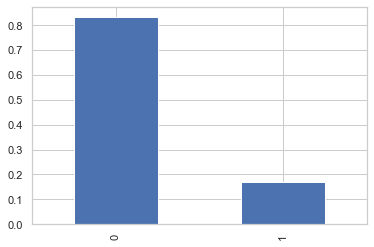

In [22]:
# 1: Not Satisfied with Rental (Satisfaction Rating of 1,2,3) - 16% 
# 0: Satisfied with Rental (Satisfaction Rating 4,5) - 83%

df.Rating.value_counts(normalize=True).plot(kind="bar");

C:\Users\Katri\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


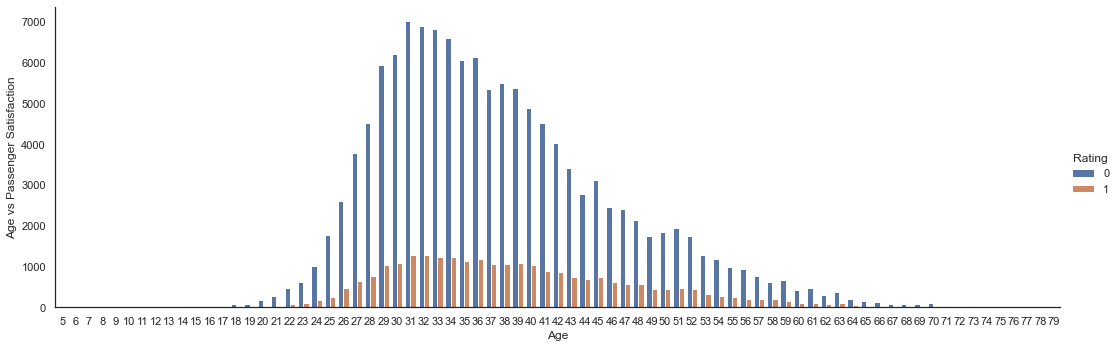

In [23]:
# Take a look at the Age distribution for satisifed and unsatisfied customers. 
# The Age distribution looks similar for both groups. 
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='Rating', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

In [ ]:
#Let's look at the correlation matrix of the features. First label encode all the categorical features. 
# We can see that Retail price and rent price are very highly correlated. That is because 
#Rent price is probably a certain percentage of the Retail price.
#Remove the Retail price column for the modeling process. 

#Also BMI and weight are related. Keep Weight variable. 

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:

lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

C:\Users\Katri\AppData\Local\Temp\ipykernel_11584\4157776663.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

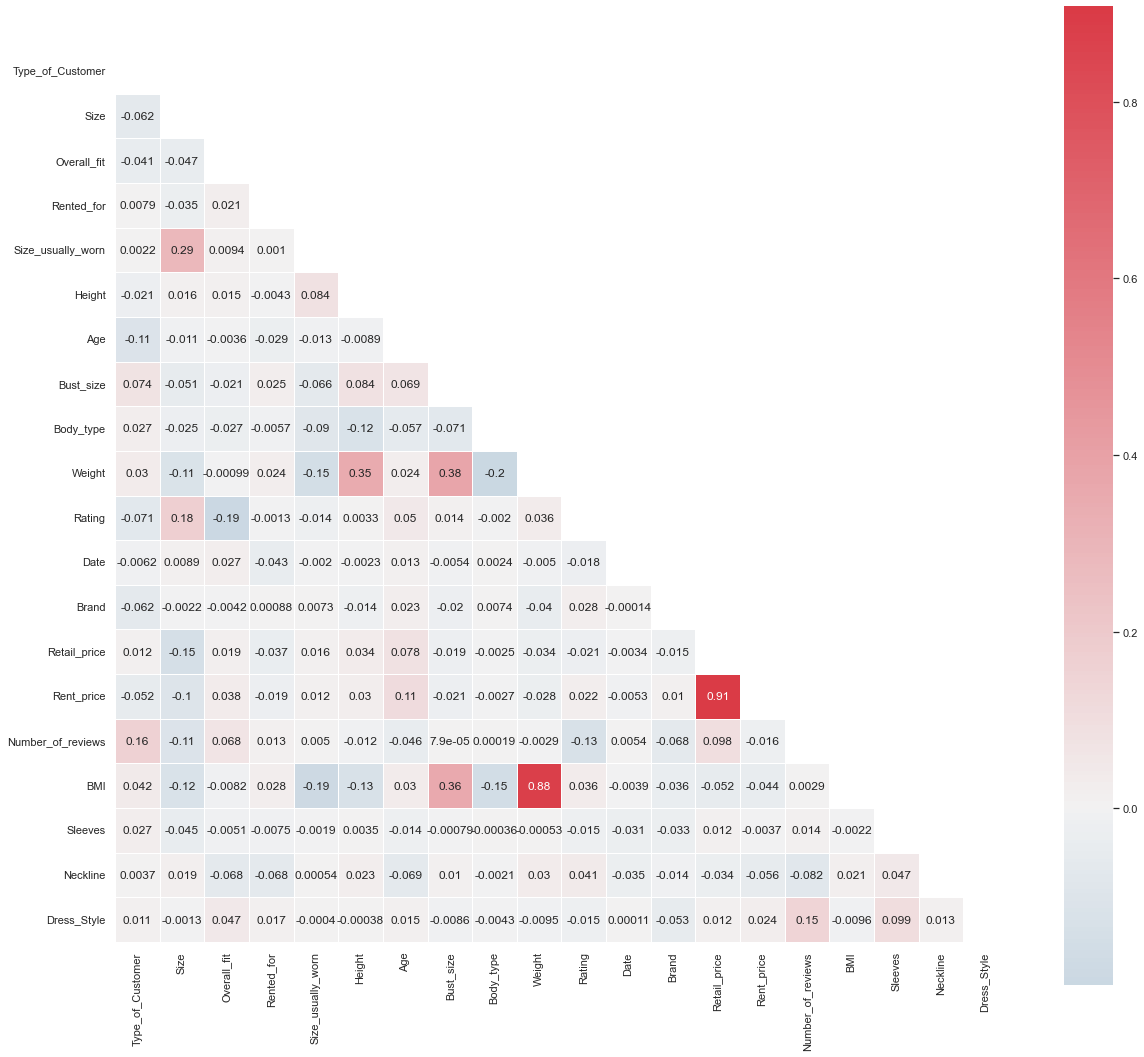

In [26]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

#### In the next notebook, IV. Feature Importance Selection, Chi Squared method and ADA Boost will be used to select most important features. 